In [1]:
import os
import sys

# Get the directory of the current file
current_dir = os.path.dirname(os.path.realpath('__file__'))

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)
import numpy as np              # Python's standard numerical library
import matplotlib.pyplot as plt # Python's scientific visualization library
import pyidi                    # Python HSC data analysis library
import pickle as pk
from pixel_setter2 import PixelSetter#, play_video, detect_peaks
from pixel_setter import play_video
from scipy.ndimage import uniform_filter
import importlib
from EMA_functions import *
from Feature_selecter import *
import matplotlib.animation as animation
from pyidi import ROISelect
from matplotlib.path import Path
root_drive_sim = os.path.normpath('G:/.shortcut-targets-by-id/1k1B8zPb3T8H7y6x0irFZnzzmfQPHMRPx/Illimited Lab Projects/Research Projects/Spiders/Simulations')

c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv('H:/My Drive/PHD/HSC/file_descriptions_wlocs.csv')
file_name_basis = 'Full_web_ecc2_new2_Floc18_v'
v_vec = [5, 7]
file_name_vec = [file_name_basis + str(x) for x in v_vec]
file_name_vec_video = [x + '_S01.cihx' for x in file_name_vec]
df_filtered = df[df['filename'].isin(file_name_vec_video)]

df_filtered

,filename,path,ecc,loc,mass,taut/loose,impact/pluck,version,n_frames,fps,Oversatured pixels,Undersatured pixels,prey_ij,spider_ij
123,Full_web_ecc2_new2_Floc18_v5_S01.cihx,H:\My Drive\PHD\HSC\ecc2\web1\Full_web_ecc2_ne...,2,18,True,Loose,Impact,5,8000,8000.0,727,18127,"(356, 234)","(553, 229)"
125,Full_web_ecc2_new2_Floc18_v7_S01.cihx,H:\My Drive\PHD\HSC\ecc2\web1\Full_web_ecc2_ne...,2,18,True,Loose,Impact,7,8000,8000.0,210,18900,"(357, 235)","(553, 229)"


In [3]:
EMA_structure = EMA_Structure(file_name_vec[0])
video = EMA_structure.open_video()
bit_depth = 16
# video = pyidi.pyIDI("D:/thijsmas/HSC/ecc2/web1/rev2/Full_web_ecc2_new2_Floc18_v5_S01/" + file_name_vec[0]+'_S01.cihx')
# video.set_method('lk_1D')

H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_new2_Floc18_v5_S01\Full_web_ecc2_new2_Floc18_v5_S01.cihx


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\pyMRAW.py:103: UserWarning: Clipped footage! (Total frame: 8000, Original total frame: 87371)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


In [4]:
# with open(os.path.join(EMA_structure.root_cam,file_name_vec[0]+'_low_impact_web.pkl'), 'wb') as f:
#     pk.dump(EMA_structure, f)
# with open(os.path.join(EMA_structure.root_cam, file_name_vec[0]+'_low_impact_web.pkl'), 'rb') as f:
#     EMA_structure2 = pk.load(f)
# EMA_structure.maxima1d = maxima1d
# EMA_structure.maxima2d = maxima2d
# displacements2D_1Dpoints = EMA_structure2.displacements2D_1Dpoints
# displacements2D_2Dpoints = EMA_structure2.displacements2D_2Dpoints
# EMA_structure.displacements2D_1Dpoints = displacements2D_1Dpoints
# EMA_structure.displacements2D_2Dpoints = displacements2D_2Dpoints
# EMA_structure.displacements2D_2Dpoints = displacements2D_2Dpoints
# EMA_structure.displacements2D_2Dpoints = displacements2D_2Dpoints


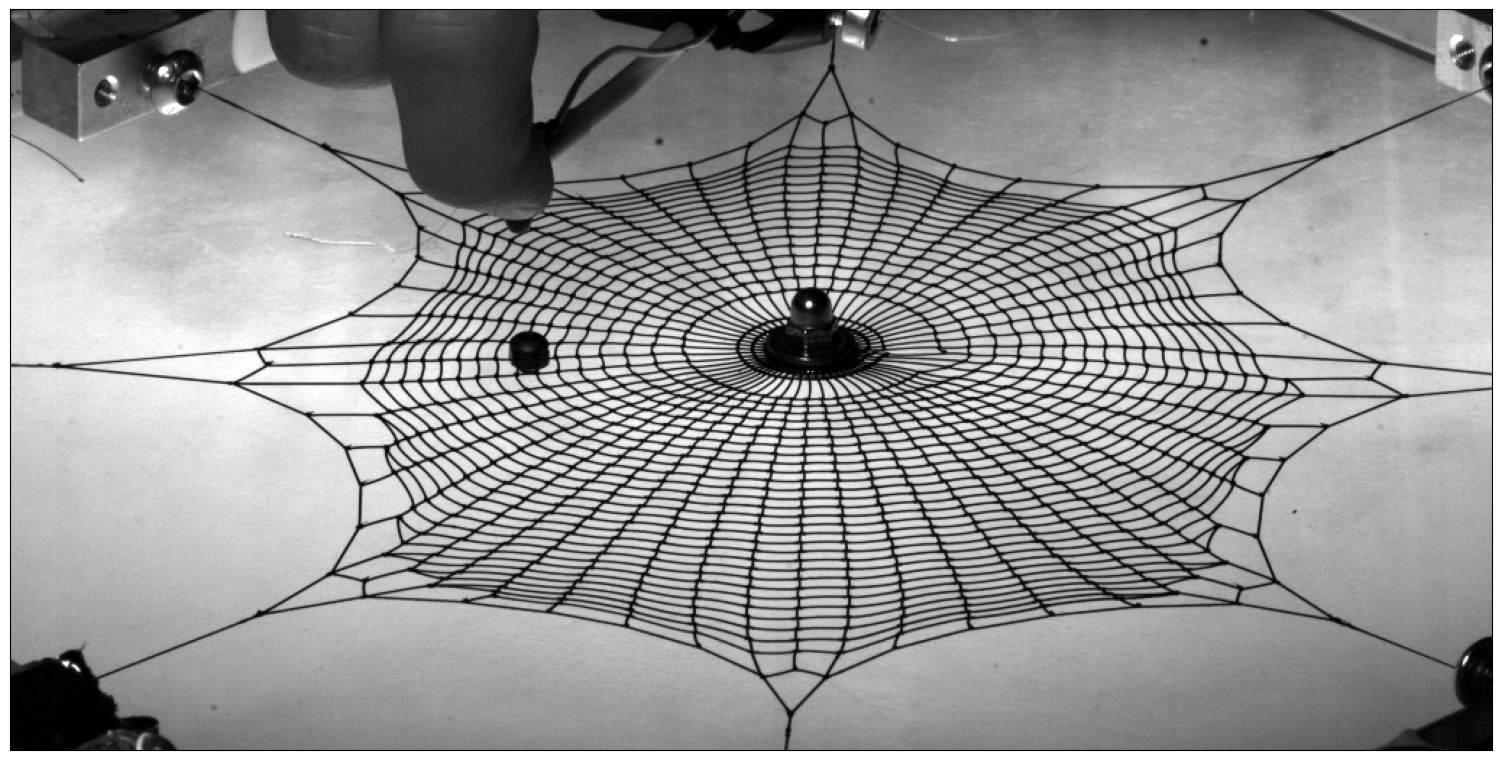

In [5]:
%matplotlib inline
sequential_image_n = 0
still_image = video.mraw[sequential_image_n]

fig, ax = EMA_structure.plot_still_frame(video, sequential_image_n, show_saturation=False)

In [6]:
# roi_select = ROISelect(video)
# roi_select.polygon
# polygon_new = np.array(roi_select.polygon)

polygon = np.array([[  11,   39,   65,  107,   80,   54,   57,   63,  113,  153,  213,
         234,  245,  265,  289,  318,  359,  401,  445,  461,  426,  427,
         448,  482,  510,  509,  461,  429,  416,  416,  427,  464,  465,
         457,  413,  374,  319,  290,  272,  260,  254,  239,  227,  187,
         171,  150,  131,   98,   63,   53,   88,  102,  106,  120,  131,
         134,  137,  143,  142,  132,  116,  110,   87,   65,   13,   11],
       [ 572,  576,  591,  775,  923,  985, 1002, 1010,  924,  862,  903,
         954, 1023, 1023,  920,  887,  876,  906, 1001,  995,  872,  718,
         631,  564,  542,  533,  496,  399,  304,  238,  179,   72,   63,
          58,  162,  214,  215,  187,  145,   61,   16,   19,  165,  256,
         276,  275,  263,  206,  135,  142,  228,  268,  276,  283,  297,
         319,  332,  342,  358,  369,  372,  422,  507,  543,  562,  572]])
path = Path(polygon.T)


In [23]:
%matplotlib qt
roi_size_vec = [(5,5), (7,7), (9,9), (11,11), (13, 13), (15,15)]
n_tracking_points_vec = [2800, 2800, 2600, 2400, 2400, 2400]
processors = 24

# roi_size_2d = (15,15)
reference_image = (0, 150)
# n_tracking_points = 2400
mean_image      = np.mean(video.mraw[reference_image[0]:reference_image[1]], axis=0)

for roi_size_2d, n_tracking_points in zip(roi_size_vec, n_tracking_points_vec):
    feature_selecter = FeatureSelecter(still_image)
    feature_selecter.set_filter_method('eig0', roi_size_2d)
    # feature_selecter.plot_image()
    score_full = feature_selecter.apply_filter(downsample=1)

    mask_image = path.contains_points(np.array([(i,j) for i in range(mean_image.shape[0]) for j in range(mean_image.shape[1])])).reshape(mean_image.shape)
    mask_image = mask_image.reshape(mean_image.shape)

    score_full[~mask_image] = 0
    score_full[mean_image >= int(0.99*(2**bit_depth-1))] = 0

    maxima2d = feature_selecter.pick_max_filter(score_image = None, min_distance = 3, absolute_treshold = None, threshold_percentage = 20, top_n_points = n_tracking_points)
    score_list = score_full[maxima2d[:, 0], maxima2d[:, 1]]
    # maxima = feature_selecter.pick_ANMS(n_points = n_tracking_points, c_robust = 0.3)
    # feature_selecter.plot_score_image(maxima=True)


    fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
    fig.set_tight_layout(True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(mean_image, cmap='gray')
    ax.scatter(maxima2d[:,1], maxima2d[:,0], marker='o',s=10, c=score_list, cmap='RdYlGn')
    ax.plot(polygon[1], polygon[0], color='k', lw=0.5)
    plt.savefig(os.path.join(EMA_structure.root_cam, file_name_vec[0] + '_maxima2d_' + str(roi_size_2d[0]) + 'x' + str(roi_size_2d[1]) + '.png'), dpi=300)

    video.set_method('lk')
    video.method.configure(roi_size = roi_size_2d, reference_image = reference_image,  resume_analysis=False) #, mraw_range=(1, 1000)
    video.set_points(maxima2d)
    displacements = video.get_displacements(processes=processors)

Available filter methods: eig0, eig1, harris, trigs, harmonic_mean, eig_theta, eig_theta_off, eig0_test, eig1_test


C:\Users\thijsmas\AppData\Local\Temp\ipykernel_23916\2797254768.py:30: PendingDeprecationWarning: The set_tight_layout function will be deprecated in a future version. Use set_layout_engine instead.
  fig.set_tight_layout(True)


--- Starting new analysis ---
 
Computation start: 2024-04-17 18:08:46.328538


KeyboardInterrupt: 

In [42]:
processors = 24

video.set_method('lk')
roi_size = (7, 7)
video.method.configure(roi_size = roi_size, reference_image = reference_image,  resume_analysis=False) #, mraw_range=(1, 1000)
video.set_points(maxima2d)
displacements = video.get_displacements(processes=processors)

--- Starting new analysis ---
 
Computation start: 2024-04-15 16:16:35.409547


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


VBox()

Computation duration: 00:42:25.26
H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_new2_Floc18_v5_S01\Full_web_ecc2_new2_Floc18_v5_S01_pyidi_analysis\analysis_005\ analysis_005


In [53]:
%matplotlib qt
roi_size_vec = [(5,5), (7,7), (9,9), (11,11), (13, 13), (15,15)]
n_tracking_points_vec = [7300, 6500, 5400, 5900, 5800, 5100]
processors = 24

# roi_size_1d = (15, 15)
# n_tracking_points = 5100
Gi, Gj = np.gradient(mean_image)
s = np.array([0,1])
Gs  = np.abs(s[1]*Gi + s[0]*Gj)
dyx = (1, 0)
smoothing_size = (1,1)

for roi_size_1d, n_tracking_points in zip(roi_size_vec, n_tracking_points_vec):
    filtered_image = uniform_filter(Gs, size=roi_size_1d)

    mask_image = path.contains_points(np.array([(i,j) for i in range(mean_image.shape[0]) for j in range(mean_image.shape[1])])).reshape(mean_image.shape)
    mask_image = mask_image.reshape(mean_image.shape)

    filtered_image[~mask_image] = 0
    filtered_image[mean_image >= int(0.99*(2**bit_depth-1))] = 0

    maxima1d = feature_selecter.pick_max_filter(score_image = filtered_image, min_distance = (3,3), absolute_treshold = None, threshold_percentage = None, top_n_points = n_tracking_points)
    score_list = filtered_image[maxima1d[:, 0], maxima1d[:, 1]]


    fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
    fig.set_tight_layout(True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(mean_image, cmap='gray')
    ax.scatter(maxima1d[:,1], maxima1d[:,0], marker='o',s=10, c=score_list, cmap='RdYlGn')
    ax.plot(polygon[1], polygon[0], color='k', lw=0.5)
    plt.savefig(os.path.join(EMA_structure.root_cam, file_name_vec[0] + '_maxima1d_' + str(roi_size_1d[0]) + 'x' + str(roi_size_1d[1]) + '.png'), dpi=300)

    video.set_method('lk_1D')
    video.method.configure(roi_size = roi_size_1d, dyx = dyx, reference_image = reference_image,  resume_analysis=False, smoothing_size = smoothing_size) #, mraw_range=(1, 1000)
    video.set_points(maxima1d)
    displacements = video.get_displacements(processes=processors)

C:\Users\thijsmas\AppData\Local\Temp\ipykernel_23916\2625593993.py:26: PendingDeprecationWarning: The set_tight_layout function will be deprecated in a future version. Use set_layout_engine instead.
  fig.set_tight_layout(True)


In [10]:
# test = 5
# test_name = 'analysis_' + str(test).zfill(3)
# # with open(os.path.join(video.root, file_name_vec[0] +'_S01_pyidi_analysis', test_name,  'points.pkl'), 'rb') as f:
# #     maxima_2d = pk.load(f)
# # with open(os.path.join(video.root, file_name_vec[0] +'_S01_pyidi_analysis', test_name, 'results.pkl'), 'rb') as f:
# #     displacements2D_2Dpoints = pk.load(f)
# with open(os.path.join(video.root, file_name_vec[0] +'_S01_pyidi_analysis', test_name, 'settings.txt'), 'r') as f:
#     settings_2d = f.read()

# test = 6
# test_name = 'analysis_' + str(test).zfill(3)
# # with open(os.path.join(video.root, file_name_vec[0] +'_S01_pyidi_analysis', test_name,  'points.pkl'), 'rb') as f:
# #     maxima1d = pk.load(f)
# # with open(os.path.join(video.root, file_name_vec[0] +'_S01_pyidi_analysis', test_name, 'results.pkl'), 'rb') as f:
# #     displacements1D_1Dpoints = pk.load(f)
# with open(os.path.join(video.root, file_name_vec[0] +'_S01_pyidi_analysis', test_name, 'settings.txt'), 'r') as f:
#     settings_1d = f.read()
# settings_2d, settings_1d

In [11]:
df = pd.read_csv('H:/My Drive/PHD/HSC/file_descriptions_wlocs.csv')
file_name_basis = 'Full_web_ecc2_new2_Floc18_v'
v_vec = [5]
file_name_vec = [file_name_basis + str(x) for x in v_vec]
file_name_vec_video = [x + '_S01.cihx' for x in file_name_vec]
df_filtered = df[df['filename'].isin(file_name_vec_video)]
df_filtered

test = '1D'
if test == '1D':
    # added_string = '_1d_and_2d_roi3x3'
    # added_string = '_1d_roi1x1'
    added_string = '_1d_roi3x3'
    # added_string = '_1d_roi5x5'
    # added_string = '_1d_roi5x5_with_smoothing'
    # added_string = '_1d_roi5x3'
    # added_string = '_1d_and_2d_5000_points'
elif test == '2D':
    # added_string = '_1d_and_2d_5000_points'
    added_string = '_1d_and_2d_roi7x7'
    # added_string = '_1d_and_2d_roi9x9'
root = 'C:/Users/thijsmas/Documents/GitHub/pyidi_data/EMA structure'

file_name = file_name_vec_video[0]
file_name_EMAs = os.path.splitext(file_name_vec[0])[0] + added_string
with open(os.path.join(root, file_name_EMAs + '.pkl'), 'rb') as f:
    EMA_structure = pkl.load(f)
points_save = EMA_structure.maxima1d
disp_save = EMA_structure.displacements1D_1Dpoints

In [12]:
# video.set_method('lk')
# video.method.configure(roi_size = roi_size_2d, reference_image = reference_image, resume_analysis=False) #, mraw_range=(1, 1000)
# # video.set_points(maxima1d)
# # displacements2D_1Dpoints = video.get_displacements(processes=12)
# video.set_points(maxima2d)
# video.show_points()
# # displacements2D_2Dpoints = video.get_displacements(processes=24)

In [13]:
# %matplotlib qt
# # td2d_1d = displacements2D_1Dpoints +  maxima1d.reshape(len(maxima1d),1,2)
# td2d_2d = displacements2D_2Dpoints +  maxima2d.reshape(len(maxima2d),1,2)
# ani = play_video(video, range(200, video.N-1), interval=10, points=td2d_2d[:, 1:, :])

In [55]:
processors = 24

video.set_method('lk_1D')
dyx = (1, 0)
smoothing_size = (1,1)
roi_size = (11,11)
video.method.configure(roi_size = roi_size, dyx = dyx, reference_image = reference_image,  resume_analysis=False, smoothing_size = smoothing_size) #, mraw_range=(1, 1000)
video.set_points(maxima1d)
displacements = video.get_displacements(processes=processors)

--- Starting new analysis ---
 
Computation start: 2024-04-12 10:21:50.985884


c:\Users\thijsmas\AppData\Local\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:528: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


VBox()

Computation duration: 00:43:30.11
H:/My Drive/PHD/HSC\ecc2\web1\Full_web_ecc2_new2_Floc18_v5_S01\Full_web_ecc2_new2_Floc18_v5_S01_pyidi_analysis\analysis_004\ analysis_004


In [56]:
%matplotlib qt
td     = displacements +  maxima1d.reshape(len(maxima1d),1,2)
# td_saved    = disp_save[::100] + points[::100].reshape(len(points[::100]),1,2)
# td1d_2d     = displacements1D_2Dpoints +  maxima2d.reshape(len(maxima2d),1,2)
ani = play_video(video, range(200, 500-1), interval=10, points=td, axis=([0, video.info['Image Width']],[video.info['Image Height'], 0]))
# ani_saved = play_video(video, range(200, 500-1), interval=10, points=td_saved, axis=([0, video.info['Image Width']],[video.info['Image Height'], 0]))

(250.0, 500.0)

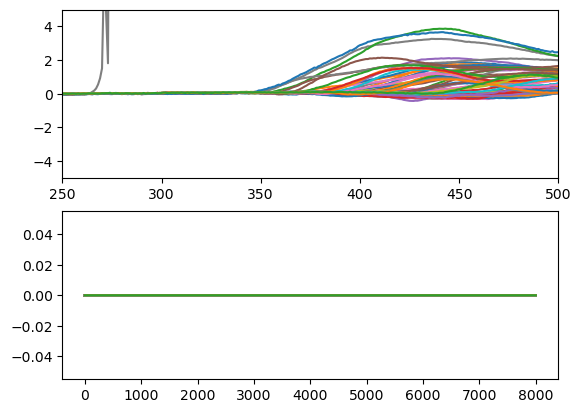

In [47]:
%matplotlib inline
fig, ax = plt.subplots(2)
for d_i in displacements[::100]:
    ax[0].plot(d_i[:,0])
    ax[1].plot(d_i[:,1])
ax[0].set_ylim(-5, 5)
ax[0].set_xlim(250, 500)

In [ ]:
# %matplotlib inline
# point_1d = 8#4
# point_2d = 8#4
# window_size = 2 * 2
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(mean_image, cmap='gray')
# ax[0].set_xlim(maxima1d[point_1d, 1]-window_size, maxima1d[point_1d, 1]+window_size)
# ax[0].set_ylim(maxima1d[point_1d, 0]-window_size, maxima1d[point_1d, 0]+window_size)
# ax[0].plot(td1d_1d[point_1d, :, 1], td1d_1d[point_1d, :, 0], 'r-', label='1D - 1D points selection')
# # ax[0].plot(td1d_2d[point_1d, :, 1], td1d_2d[point_1d, :, 0], 'b-', label='2D - 1D points selection')
# ax[0].plot(maxima1d[:, 1], maxima1d[:, 0], 'rx')
# ax[0].set_xticks([])
# ax[0].set_yticks([])
# ax[0].legend()

# ax[1].imshow(mean_image, cmap='gray')
# ax[1].set_xlim(maxima2d[point_2d, 1]-window_size, maxima2d[point_2d, 1]+window_size)
# ax[1].set_ylim(maxima2d[point_2d, 0]-window_size, maxima2d[point_2d, 0]+window_size)
# ax[1].plot(td2d_1d[point_2d, :, 1], td2d_1d[point_2d, :, 0], 'r-', label='1D - 2D points selection')
# ax[1].plot(td2d_2d[point_2d, :, 1], td2d_2d[point_2d, :, 0], 'b-', label='2D - 2D points selection')
# ax[1].plot(maxima2d[:, 1], maxima2d[:, 0], 'rx')
# ax[1].set_xticks([])
# ax[1].set_yticks([])
# ax[1].legend()

# # fig.savefig(os.path.join(EMA_structure.root_simulations,'1d-2d-motion',file_name_vec[0]+"_motion_overlay_comparison.png"), dpi=300, bbox_inches='tight')



In [ ]:
# %matplotlib inline
# t_vec = np.arange(0, len(td1d_1d[0, :, 0]), 1) /video.info['Record Rate(fps)']
# point_1d = 8
# point_2d = 8

# fig, ax = plt.subplots(2, 1, figsize=(12, 12))
# ax[0].plot(t_vec, displacements1D_1Dpoints[point_1d, :, 0], 'r', label='y-displacements (1D) - 1D points selection')
# ax[0].plot(t_vec, displacements2D_1Dpoints[point_1d, :, 0], 'b--', label='y-displacements (2D) - 1D points selection')
# # ax[0].plot(t_vec, np.linalg.norm(displacements2D[point, :], axis=1), label='2d-norm')
# ax[0].set_xlabel('Time (s)')
# ax[0].set_ylabel('Displacement (px)')
# ax[0].legend()

# ax[1].plot(t_vec, displacements2D_1Dpoints[point_2d, :, 0], 'r', label='y-displacements (1D) - 2D points selection')
# ax[1].plot(t_vec, displacements2D_2Dpoints[point_2d, :, 0], 'b--', label='y-displacements (2D) - 2D points selection')
# # ax[1].plot(t_vec, np.linalg.norm(displacements2D[point, :], axis=1), label='2d-norm')
# ax[1].set_xlabel('Time (s)')
# ax[1].set_ylabel('Displacement (px)')
# ax[1].legend()
# # fig.savefig(os.path.join(EMA_structure.root_simulations,'1d-2d-motion',file_name_vec[0]+"_signals.png"), dpi=300, bbox_inches='tight')

In [ ]:
EMA_structure.displacements = displacements1D_1Dpoints
# EMA_structure.displacements1D_2Dpoints = displacements1D_2Dpoints
# EMA_structure.displacements2D_1Dpoints = displacements2D_1Dpoints
# EMA_structure.displacements2D_2Dpoints = displacements2D_2Dpoints
EMA_structure.maxima = points[:2]
# EMA_structure.maxima2d = maxima2d
EMA_structure.mean_image = mean_image
root = 'C:/Users/thijsmas/Documents/GitHub/pyidi_data/'
path = os.path.join(root, 'EMA structure', file_name_vec[0]+f'_1d_roi{roi_size_1d[0]}x{roi_size_1d[1]}_temp.pkl')
with open(path, 'wb') as f:
    pk.dump(EMA_structure, f)